<a href="https://colab.research.google.com/github/techshot25/WinningPrimaries/blob/master/WinningPrimaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winning Primaries
### By Ali J. Shannon


---

In this module, I intend to find the probability of winning the primaries using predicive models brought by sklearn logistic regression modes found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

I will also be using [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) and [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from the sklearn libraries.

The purpose of this model is find the best predictor of winning the primary elections. I will use features such as endorsement points and money raised to classify my data by whether or not they won the primary elections. 

Using this, I will train the machine learning models and test their accuracy with a set of data taken out of the data file but omitted from the testing set.


---


Information about the data used are found below.

# Endorsements through June 30

This folder contains data behind the story [Pols And Polls Say The Same Thing: Jeb Bush Is A Weak Front-Runner](http://fivethirtyeight.com/features/pols-and-polls-say-the-same-thing-jeb-bush-is-a-weak-front-runner/).

This data includes something we call "endorsement points," an attempt to quantify the importance of endorsements by weighting each one according to the position held by the endorser: 10 points for each governor, 5 points for each senator and 1 point for each representative.

Header | Definition
---|---------
`year` | Election year
`party` | Political party
`candidate` | Candidate running in primary
`endorsement_points` | Weighted endorsements through June 30th of the year before the primary
`percentage_endorsement_points` | Percentage of total weighted endorsement points for the candidate's political party through June 30th of the year before the primary
`money_raised` | Money raised through June 30th of the year before the primary
`percentage_of_money` | Percentage of total money raised by the candidate's political party through June 30th of the year before the primary
`primary_vote_percentage` | Percentage of votes won in the primary
`won_primary` | Did the candidate win the primary?


In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('endorsements-june-30.csv')

df[df.columns[2:]].head()

,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
0,George H.W. Bush,5,6.32911,1475332.0,16.83,23.81,No
1,Lowell Weicker,0,0.00000,60000.0,0.68,0.00,No
2,Phil Crane,0,0.00000,2500000.0,28.53,0.76,No
3,John Connally,6,7.59494,2200000.0,25.10,0.64,No
4,Bob Dole,0,0.00000,253286.0,2.89,0.06,No


#### Classifications

I will break these columns as my classifiers:


  1. Percentage of total weighted endorsement points for the candidate's political party through June 30th of the year before the primary
  2.	Money raised through June 30th of the year before the primary
  3. 	Percentage of total money raised by the candidate's political party through June 30th of the year before the primary
  4. Percentage of votes won in the primary
  
It may become obvious that winning the primaries highly depends on the last feature: `precentage of votes`. However, if we test a logistic regression against another column, like the `money raised`, we will notice a significant impact on the classifiers.


In [0]:
X = df[df.columns[3:8]].values
y = df[df.columns[8]].values


# take out every 5th element for accuracy testing
test_idx = [x for x in range(len(y)) if x%5 == 0]

y_train = np.delete(y, test_idx)
X_train = np.delete(X, test_idx, axis = 0)

y_test = [y[i] for i in test_idx]
X_test = [X[i] for i in test_idx]

Now I will use `LogisticRegression` to create the predictive model: `LogReg`

In [3]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')

LogReg = LogReg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predictions = LogReg.predict(X_test)

print("Using LogisticRegression, the accuracy compared to test values is {:.3}".format(
    accuracy_score(y_test, predictions))
)

Using LogisticRegression, the accuracy compared to test values is 0.909


In [4]:
from sklearn import tree

DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)

predictions = DecTree.predict(X_test)

print("Using Decision Tree Classifier, the accuracy compared to test values is {:.3}".format(
    accuracy_score(y_test, predictions))
)

Using Decision Tree Classifier, the accuracy compared to test values is 1.0


In [5]:
from sklearn import svm

SuppVecM = svm.SVC(gamma='scale')
SuppVecM.fit(X_train, y_train)

predictions = SuppVecM.predict(X_test)

print("Using Support Vector Machine, the accuracy compared to test values is {:.3}".format(
    accuracy_score(y_test, predictions))
)

Using Support Vector Machine, the accuracy compared to test values is 0.909


#### Is the data too correated?

Now I will check if the data is too highly correlated. I will use a plotting method since I only want to compare two features; `money raised` and `precentage of votes`.

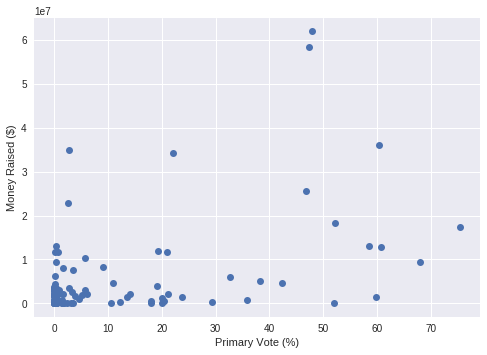

In [6]:
import matplotlib.pyplot as plt

u = df['primary_vote_percentage'].values
v = df['money_raised'].values


plt.plot(u, v, 'o')
plt.xlabel('Primary Vote (%)')
plt.ylabel('Money Raised ($)')
plt.show()

Since it is difficult to come up with any simple polynomial that can relate the two, then they are at least not linearly correlated.

Hence, with this I intend to use Decision Tree Classifier because it offers the highest accuracy of 100% compared to 91% by Support Vector Machine and Logistic Regression